# S04 T01: Transformación Registro Log con Regular expresiones

El análisis de registros es una función importante para el control y la alerta, el cumplimiento de las políticas de seguridad, la auditoría y el cumplimiento normativo, la respuesta a incidentes de seguridad e incluso las investigaciones forenses. Al analizar los datos de registro, las empresas pueden identificar más fácilmente las posibles amenazas y otros problemas, encontrar la causa raíz e iniciar una respuesta rápida para mitigar los riesgos.

## Nivel 1
El analista debe asegurarse de que los registros consisten en una gama completa de mensajes y se interpretan según el contexto. Los elementos de registro deben estandarizarse, utilizando los mismos términos o terminología, para evitar confusiones y proporcionar cohesión.

Como Científico de Datos se te ha proporcionado acceso a los registros-Logs donde queda registrada la actividad de todas las visitas realizadas en la página web de la agencia de viajes "akumenius.com".

### Ejercicio 1
Estandariza, identifica y enumera cada uno de los atributos/variables de la estructura del archivo " Web_access_log-akumenius.com " que encontrarás en el repositorio de GitHub "Data-sources".

___

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # regular expressions
import json
import requests

In [2]:
#import register logs normal

logs = pd.read_csv('Web_access_log-akumenius.com.txt',names=["Unique_Colum"])
logs.head()

,Unique_Colum
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...


El archivo con los log muestra todos los datos agrupados en una sola columna, para poder separar los datos de acuerdo a sus atributos/variables, se utiliza regex para establecer las separaciones para cada columna y crear el dataframe.

**Notas de Regex:**
- ^ : excluir 
- /s : coincidencias con espacios en blanco
- ? : para opcionalidad
- asterisco : cero o mas repeticiones

In [3]:
#change the import of register logs with regular expresion:
web_logs = pd.read_csv('Web_access_log-akumenius.com.txt',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])', #regex to separate de atributes
    engine='python',
    na_values="-",
    header=None,
    usecols=[0, 1, 4, 5, 6, 7, 8, 9], #columns 2 and 3 only had values '-'
    names=['host','IP', 'date', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'status': int}) 
web_logs.head()

,host,IP,date,request,status,size,referer,user_agent
0,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""


## Nivel 2
### Ejercicio 2
Limpieza, preprocesa, estructura y transforma (dataframe) los datos del registro de acceso a la web.

**Primero obtenemos informacion basica del dataframe inicial para analizar y decidir los procesos de transformacion y estructura que seran de interes.**

In [5]:
web_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 8 columns):
host          261873 non-null object
IP            261873 non-null object
date          261873 non-null object
request       261873 non-null object
status        261873 non-null int64
size          219538 non-null float64
referer       261873 non-null object
user_agent    261873 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 16.0+ MB


In [6]:
web_logs.shape

(261873, 8)

In [7]:
web_logs.isnull().sum()

host              0
IP                0
date              0
request           0
status            0
size          42335
referer           0
user_agent        0
dtype: int64

1. Se puede observar en la informacion obtenida de los datos que solo 'status' es diferente de object. 
2. Se observa que el dataframe tiene 261873 filas y 8 columnas.
3. Solo se encuentran valores null en la columna size (42335)
___
Se procede a transformar los datos de acuerdo a lo siguiente:
- primero dividiremos la columna que incluye la hora y fecha en dos columnas, una para cada variable

In [4]:
from datetime import datetime
from user_agents import parse
from http.client import responses


In [5]:
# extract time
web_logs.insert(3, 'time', None) #Set a new column for time as a 3rd column
web_logs.time = pd.to_datetime(web_logs.time, format='%d/%b/%Y:%H:%M:%S', errors = 'ignore') #Asign a 'datetime' structure
web_logs.time = web_logs.date.str.extract(':(\d{2}:\d{2}:\d{2}.*)]') # Extract the time to 'date'

#extract date

web_logs.date = web_logs.date.str.extract('(\d+/\w+/\d+)')#Selection of the date
web_logs.date = pd.to_datetime(web_logs.date, format='%d/%b/%Y') # Asign the 'datetime' structure

In [10]:
web_logs

,host,IP,date,time,request,status,size,referer,user_agent
0,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
5,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
6,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
7,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
8,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
9,localhost,127.0.0.1,2014-02-23,03:10:31 +0100,"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""


Ahora se analizan otras columnas:
- se revisa la columna 'host' para identificar cuantos servidores fueron utilizados por las IP registradas.

In [11]:
web_logs.host.unique()

array(['localhost', 'www.akumenius.com', 'akumenius.com', 'akumenius.es',
       'test.akumenius.com'], dtype=object)

Se hacen otras transformaciones a los datoscomo: 
- cambiar el tipo de dato de la columna 'size'
- se extrae de la columna 'user_agent' informacion sobre el tipo de buscador utilizados
- se cambian valores de referer de "-" a NaN
 

In [12]:
#change the column size to int
web_logs.size = pd.to_numeric(web_logs['size'], errors='coerce') # errors = 'coerce' -> cannot convert float NaN to integer

In [13]:
#extract the user_agent, the type of explorer and the browser version.

web_logs["user_agent"] = web_logs["user_agent"].str.replace("\"","")
web_logs["browser_family"] = web_logs["user_agent"].apply(lambda x: parse(x).browser.family )
web_logs["browser_version"] = web_logs["user_agent"].apply(lambda x: parse(x).browser.version_string)

In [14]:
#change values of referer from "-" to NaN
web_logs["referer"] = web_logs["referer"].str.replace("\"","")
web_logs["referer"]= web_logs["referer"].apply(lambda x: np.nan if x == "-" else x)

### Ejercicio 3
Geolocaliza las IP's.
___
Primero revisamos cuantas IPS tenemos registradas que sean similares:

In [16]:
len(web_logs.IP.unique())

2921

Definimos un metodo para geolocalizar las IPs, utilizando una base de datos de geolocalizacion gratuita: Geolocation DB. 

In [6]:
import pygeoip #import library
gi = pygeoip.GeoIP('GeoLiteCity.dat', pygeoip.MEMORY_CACHE) #upload data

Ahora, para geolocalizar las IP se utiliza el paquete pygeoip que permite localizar la informacion geografica de la direccion IP.

In [7]:
#create subset from the dataframe grouping the same ips.
geo_localizations = web_logs.groupby('IP').size()

Despues, se va a crear un bucle para encontrar e indexar la informacion de cada IP en un nuevo df.

In [8]:
ip_data = [] #create empty dictionary
# Create a loop for fill the new dictionary with geolocalization info:
for iip in geo_localizations.index:
    if gi.record_by_addr(iip):
        rres = gi.record_by_addr(iip)
        rres['ip'] = iip
        rres['Number'] = geo_localizations[iip] #add the number of times an IP appears in the df
        ip_data.append(rres)
    else:
        geo_localizations.drop(labels=[iip])

# Create Data Frame from this list, use ips index:
reg = pd.DataFrame(ip_data)
reg.set_index('ip', inplace=True)
reg.head()

,Number,area_code,city,continent,country_code,country_code3,country_name,dma_code,latitude,longitude,metro_code,postal_code,region_code,time_zone
ip,,,,,,,,,,,,,,
101.199.108.59,32,0,Beijing,AS,CN,CHN,China,0,39.9289,116.3883,None,None,22,Asia/Harbin
101.226.167.226,1,0,Shanghai,AS,CN,CHN,China,0,31.0456,121.3997,None,None,23,Asia/Shanghai
107.178.37.48,194,408,Cupertino,NA,US,USA,United States,807,37.3042,-122.0946,"San Francisco, CA",95014,CA,America/Los_Angeles
107.178.38.221,176,408,Cupertino,NA,US,USA,United States,807,37.3042,-122.0946,"San Francisco, CA",95014,CA,America/Los_Angeles
107.21.14.116,2,703,Ashburn,NA,US,USA,United States,511,39.0481,-77.4728,"Washington, DC",20149,VA,America/New_York


In [40]:
#change latitud and longitud data type
reg.latitude = pd.to_numeric(reg['latitude'], errors='coerce')
reg.longitude = pd.to_numeric(reg['longitude'], errors='coerce')

In [41]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 101.199.108.59 to 98.244.10.248
Data columns (total 14 columns):
Number           2919 non-null int64
area_code        2919 non-null int64
city             2565 non-null object
continent        2919 non-null object
country_code     2919 non-null object
country_code3    2919 non-null object
country_name     2919 non-null object
dma_code         2919 non-null int64
latitude         2919 non-null float64
longitude        2919 non-null float64
metro_code       570 non-null object
postal_code      2086 non-null object
region_code      2606 non-null object
time_zone        2722 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 342.1+ KB


In [46]:
reg.isnull().sum()

Number              0
area_code           0
city              354
continent           0
country_code        0
country_code3       0
country_name        0
dma_code            0
latitude            0
longitude           0
metro_code       2349
postal_code       833
region_code       313
time_zone         197
dtype: int64

## Nivel 3
### Ejercicio 3
Muéstrame tu creatividad, Sorpréndame da un paso más allá con el análisis anterior.

Ahora utilizando la libreria Folium se crea un mapa que muestre las localizaciones obtenidas en el paso anterior

In [32]:
#install library from the notebook
import sys
!conda install --yes --prefix {sys.prefix} folium

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Usuario\anaconda3\envs\sprint_cuatro

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.12.0              |     pyhd8ed1ab_1          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.2-pyhd8ed1ab_0
  folium             conda-forge/noarch::folium-0.12.0-pyhd8ed

In [9]:
#import the library
import folium
from folium.plugins import MarkerCluster

In [10]:
#create base map for the geolocalization
m = folium.Map(location=reg[["latitude", "longitude"]].mean(), zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

#loop to cluster the IP in regions
for i in range(0, len(reg)):
    folium.CircleMarker(location = [reg.iloc[i]['latitude'], reg.iloc[i]['longitude']], 
                        radius = 5, fill_opacity = 0.9).add_to(marker_cluster)
    
m.save('ip_location.html') #save the image
m #show map

Del mapa anterior, se puede observar que la mayor parte de accesos a la web se realizan desde España.
Ahora, para observar exactamente la cantidad de vistas desde cada pais se genera un subset del dataframe agrupando los paises por numero de visitas y observandolos en una grafica de barras.

In [60]:
country_entry = reg.groupby('country_name')[['Number']].count().sort_values(by = 'Number', ascending = False)
country_entry = country_entry.iloc[0:10] # Only the first 10, the rest have few visits
country_entry.head()

,Number
country_name,
Spain,1292
United States,683
China,377
France,108
Germany,68


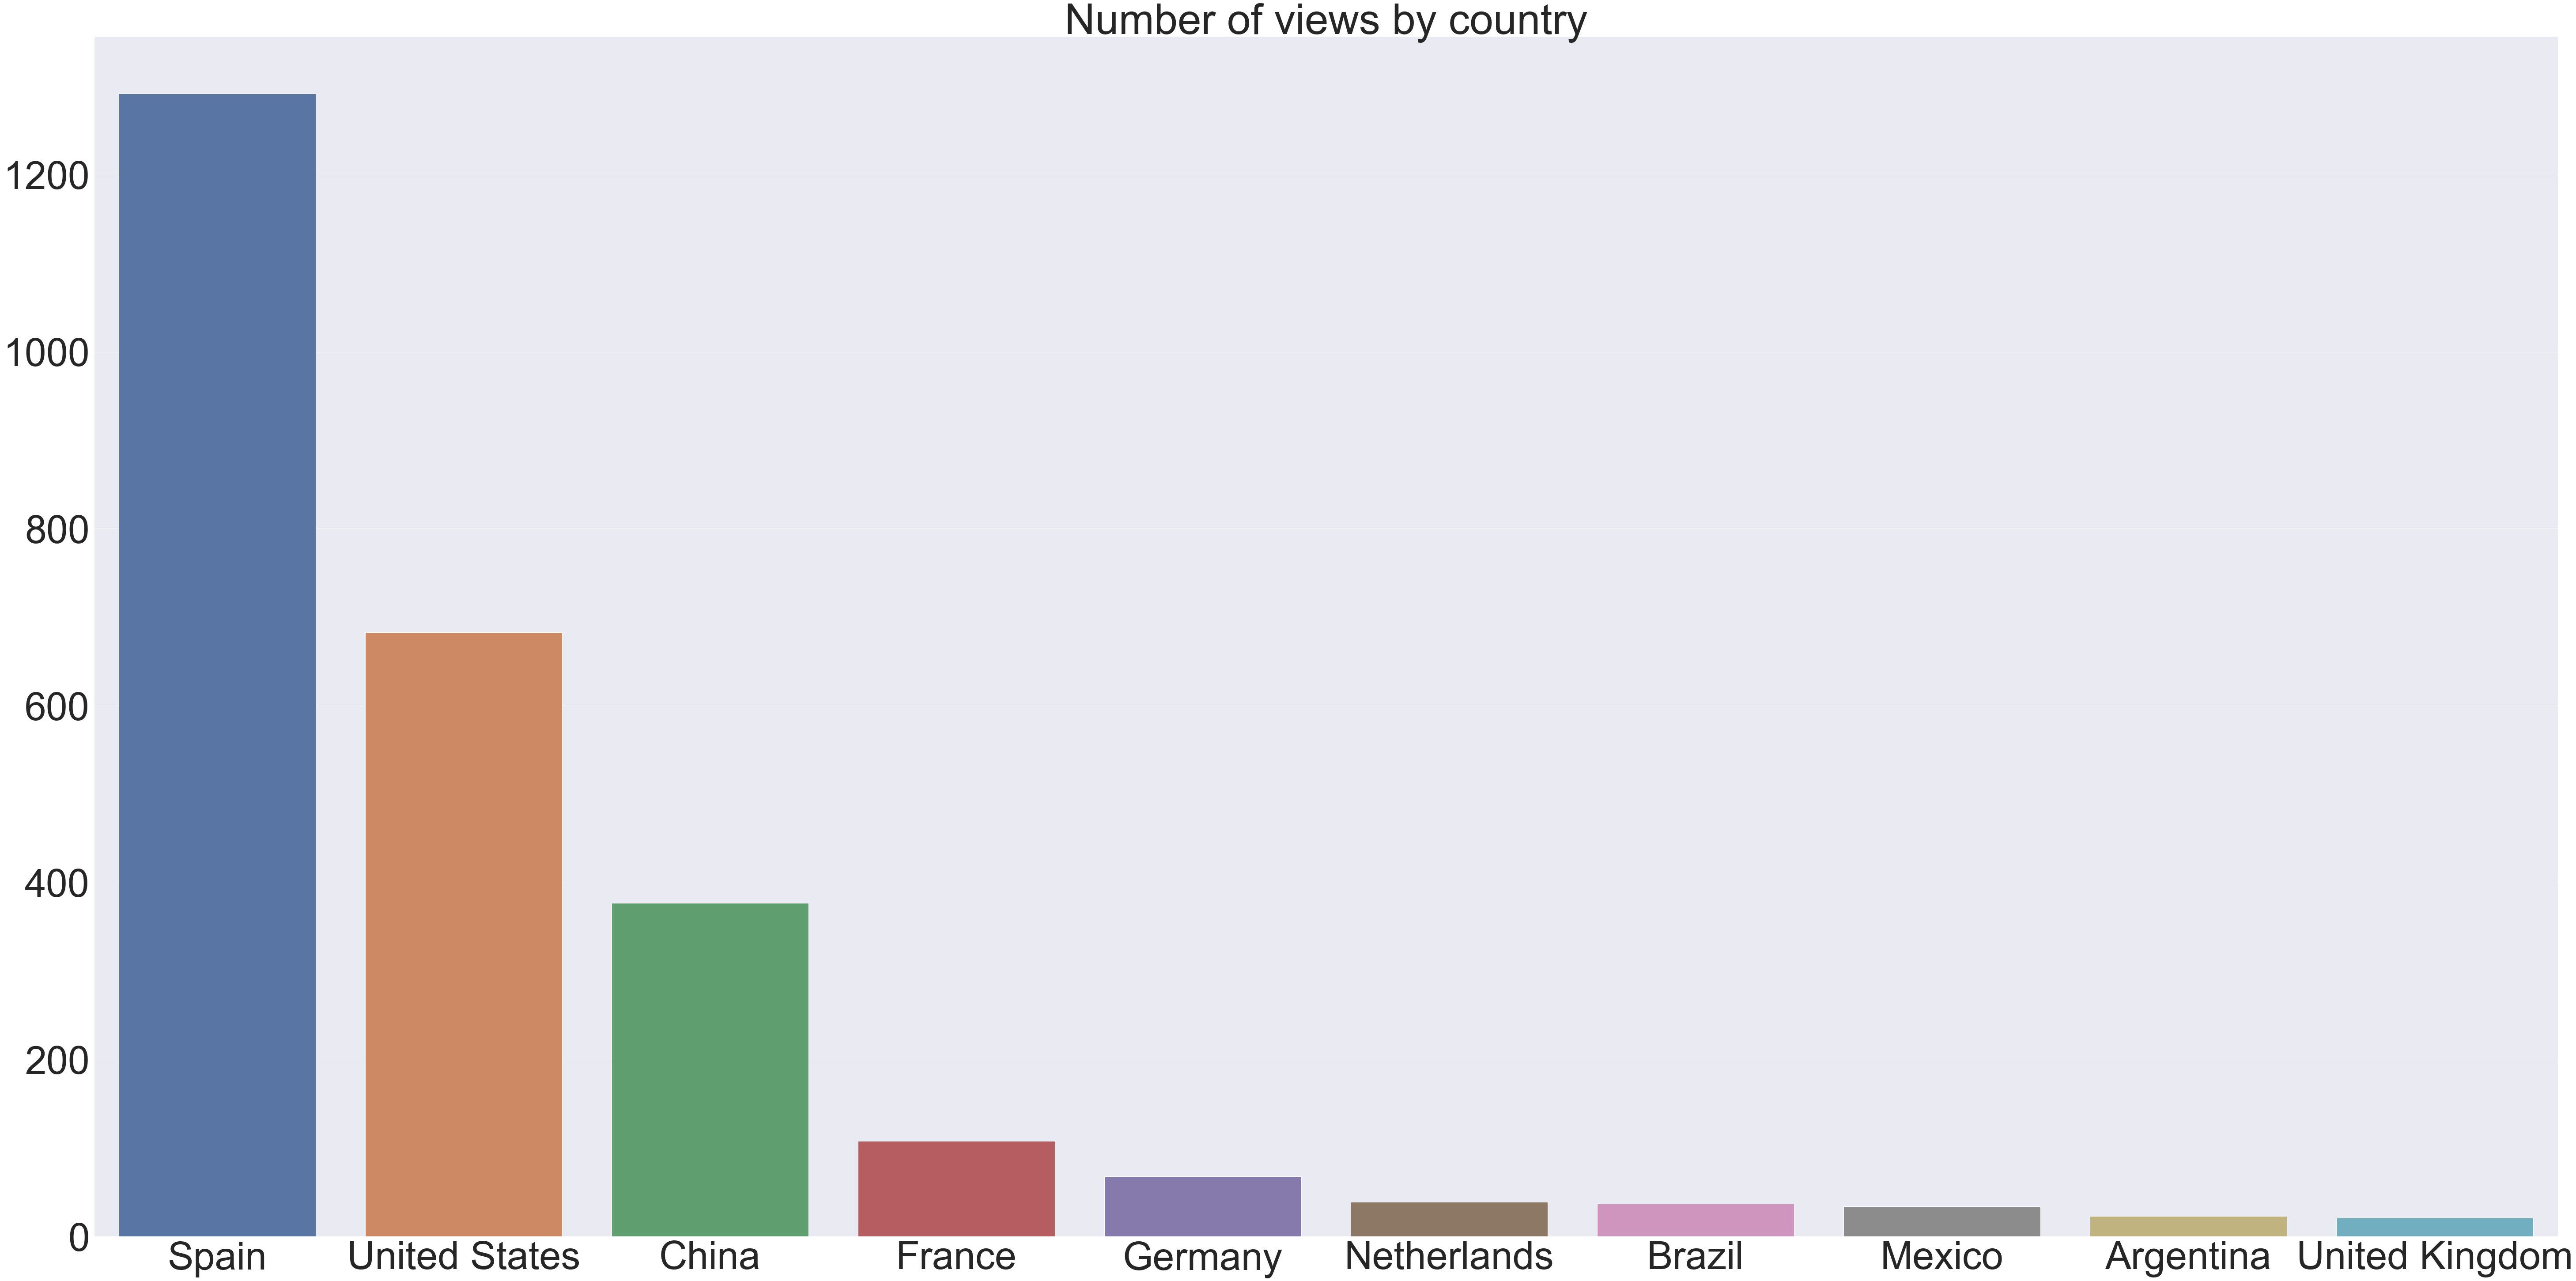

In [111]:
views = country_entry.values
views = np.concatenate(views)
countries = country_entry.index

sns.set(font_scale=8) #scale the font size
fig, ax1 = plt.subplots(figsize=(100,50), sharex=True)
views_per_country = sns.barplot(data = country_entry, x = countries, y= views )
views_per_country.set(title='Number of views by country',ylabel=None,xlabel=None)

plt.show()

Este grafico confirma lo observado en el mapa, con España como el principal pais desde el que se accede a la pagina.
Ahora, se puede indagar de que areas de España es de donde tienen mas vistas:


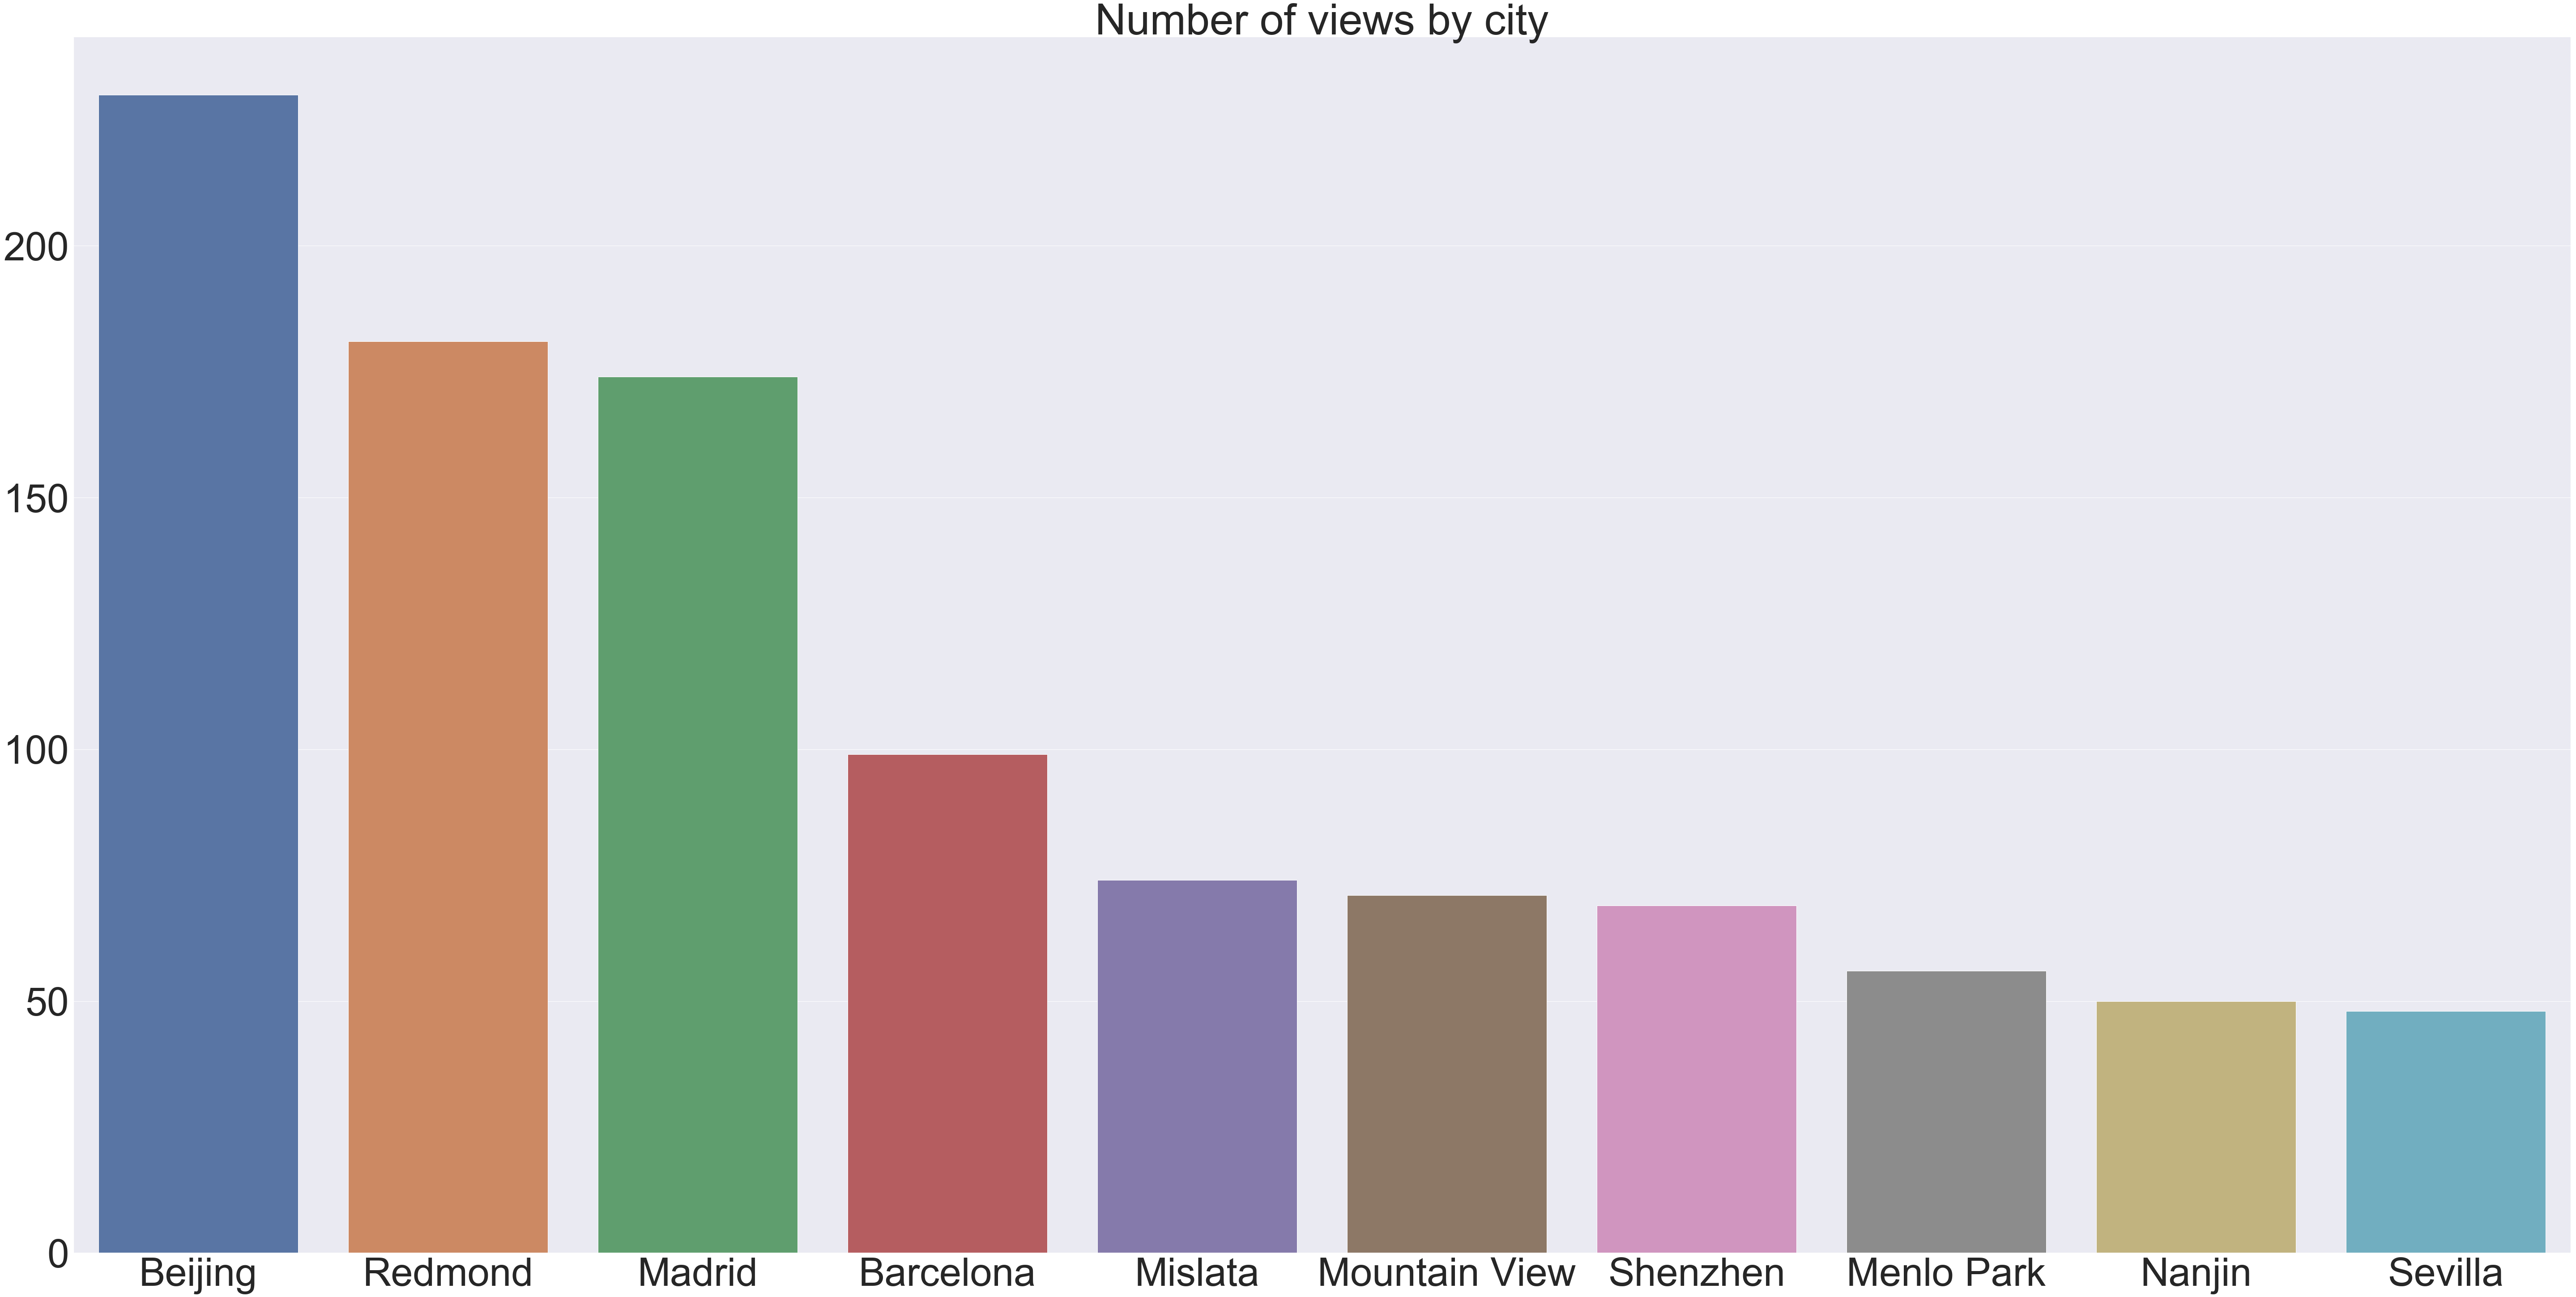

In [113]:
city_entry = reg.groupby('city')[['Number']].count().sort_values(by = 'Number', ascending = False)
city_entry = city_entry.iloc[0:10]
views_city = city_entry.values
views_city = np.concatenate(views_city)
cities = city_entry.index

sns.set(font_scale=8) #scale the font size
fig, ax1 = plt.subplots(figsize=(100,50), sharex=True)
views_per_country = sns.barplot(data = city_entry, x = cities, y= views_city )
views_per_country.set(title='Number of views by city',ylabel=None,xlabel=None)

plt.show()

Se puede observar que aunque España es el pais con mayor visitas al sitio acumuladas entre las ciudades que la componen, individualmente la ciudad de Beijing es la que hace mas visitas al sitio.